In [1]:
import stereo as st
import warnings
warnings.filterwarnings('ignore')



In [5]:
st.__version__
data_path = '/media/snu/Work/Stomics/output/04.tissuecut/B02822A1.tissue.gef'
st.io.read_gef_info(data_path)


[2025-03-22 13:44:28][Stereo][327800][MainThread][135010282481472][reader][1379][INFO]: This is GEF file which contains traditional bin infomation.
[2025-03-22 13:44:28][Stereo][327800][MainThread][135010282481472][reader][1380][INFO]: bin_type: bins
[2025-03-22 13:44:28][Stereo][327800][MainThread][135010282481472][reader][1383][INFO]: Bin size list: ['bin1']
[2025-03-22 13:44:28][Stereo][327800][MainThread][135010282481472][reader][1389][INFO]: Resolution: 500
[2025-03-22 13:44:28][Stereo][327800][MainThread][135010282481472][reader][1392][INFO]: Gene count: 34708
[2025-03-22 13:44:28][Stereo][327800][MainThread][135010282481472][reader][1401][INFO]: offsetX: 0
[2025-03-22 13:44:28][Stereo][327800][MainThread][135010282481472][reader][1404][INFO]: offsetY: 1
[2025-03-22 13:44:28][Stereo][327800][MainThread][135010282481472][reader][1407][INFO]: Width: 26459
[2025-03-22 13:44:28][Stereo][327800][MainThread][135010282481472][reader][1410][INFO]: Height: 26458
[2025-03-22 13:44:28][Ster

{'bin_list': ['bin1'],
 'resolution': 500,
 'gene_count': 34708,
 'offsetX': 0,
 'offsetY': 1,
 'width': 26459,
 'height': 26458,
 'maxExp': 13}

In [6]:
data = st.io.read_gef(file_path=data_path, bin_size=20)

[2025-03-22 13:44:29][Stereo][327800][MainThread][135010282481472][reader][1201][INFO]: read_gef begin ...


[2025-03-22 13:44:38][Stereo][327800][MainThread][135010282481472][reader][1350][INFO]: the matrix has 249176 cells, and 34708 genes.
[2025-03-22 13:44:38][Stereo][327800][MainThread][135010282481472][reader][1351][INFO]: read_gef end.


In [7]:
data.tl.cal_qc()

[2025-03-22 13:44:38][Stereo][327800][MainThread][135010282481472][st_pipeline][41][INFO]: start to run cal_qc...
[2025-03-22 13:44:39][Stereo][327800][MainThread][135010282481472][st_pipeline][44][INFO]: cal_qc end, consume time 0.5097s.


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

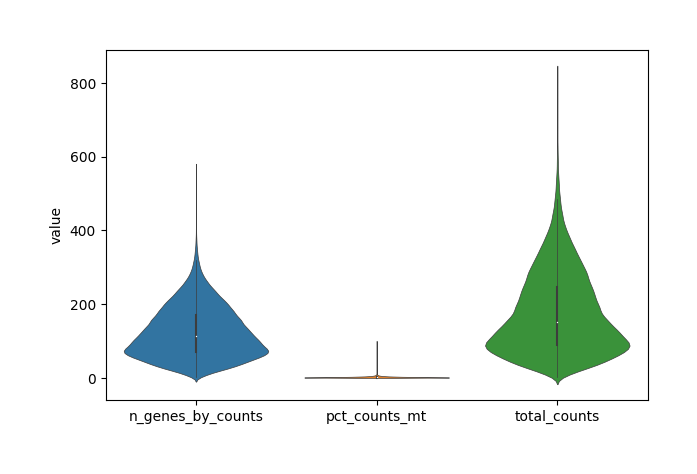

In [8]:
data.plt.violin()

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

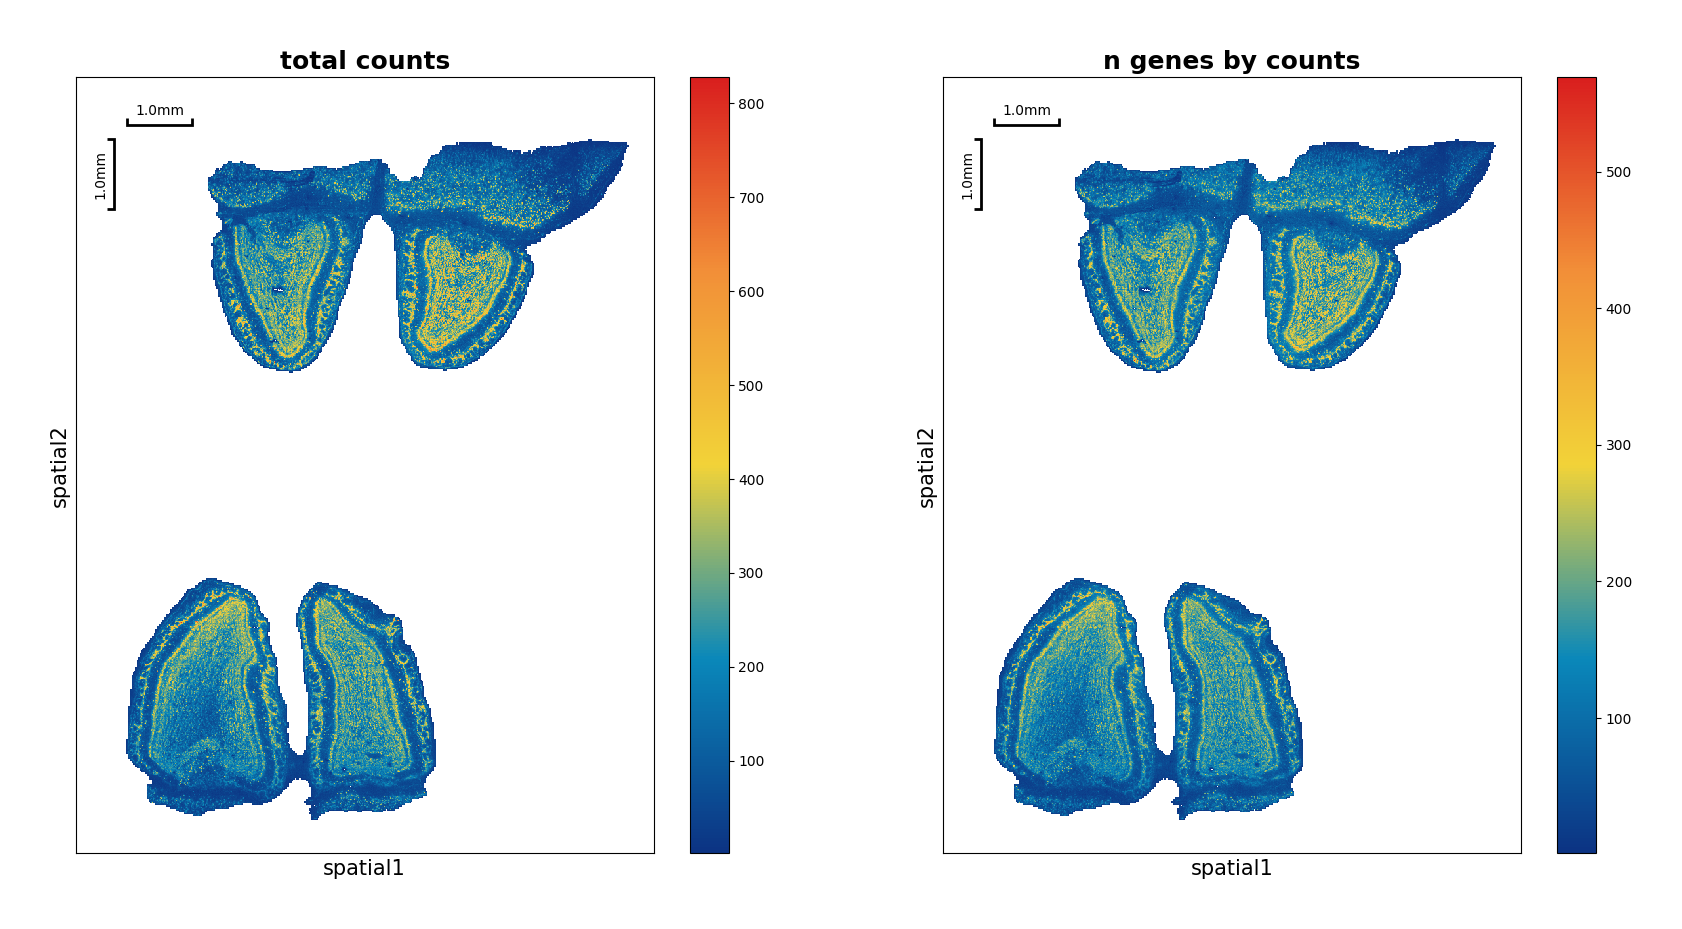

In [9]:
data.plt.spatial_scatter()

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

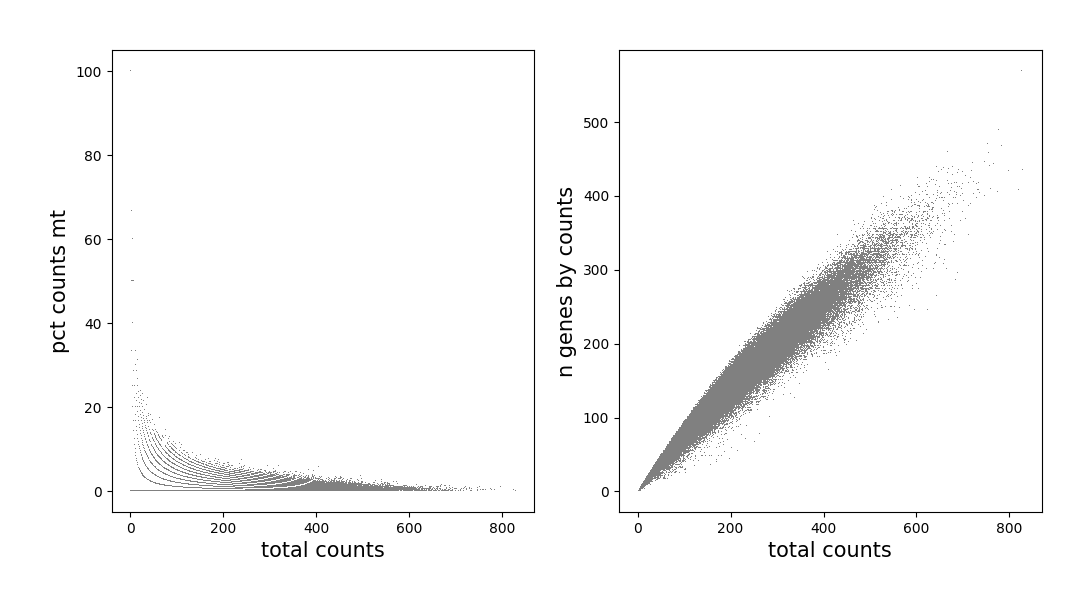

In [10]:
data.plt.genes_count()



In [11]:
data.tl.filter_cells(
        min_gene=30,
        min_n_genes_by_counts=3,
        pct_counts_mt=5,
        inplace=True
        )
data

[2025-03-22 13:46:20][Stereo][327800][MainThread][135010282481472][st_pipeline][41][INFO]: start to run filter_cells...
[2025-03-22 13:46:21][Stereo][327800][MainThread][135010282481472][st_pipeline][44][INFO]: filter_cells end, consume time 0.3657s.


StereoExpData object with n_cells X n_genes = 232341 X 34708
bin_type: bins
bin_size: 20
offset_x = 0
offset_y = 1
cells: ['cell_name', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt']
genes: ['gene_name', 'n_cells', 'n_counts', 'mean_umi']
cells_matrix = ['spatial']
Layers with keys: 
result: []

In [12]:
data.tl.raw_checkpoint()

In [13]:
data.tl.raw



StereoExpData object with n_cells X n_genes = 232341 X 34708
bin_type: bins
bin_size: 20
offset_x = 0
offset_y = 1
cells: ['cell_name', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt']
genes: ['gene_name', 'n_cells', 'n_counts', 'mean_umi']
cells_matrix = ['spatial']
Layers with keys: 
result: []

In [14]:
data.tl.normalize_total(target_sum=10000)
data.tl.log1p()

[2025-03-22 13:46:23][Stereo][327800][MainThread][135010282481472][st_pipeline][41][INFO]: start to run normalize_total...
[2025-03-22 13:46:24][Stereo][327800][MainThread][135010282481472][st_pipeline][44][INFO]: normalize_total end, consume time 0.2722s.
[2025-03-22 13:46:24][Stereo][327800][MainThread][135010282481472][st_pipeline][41][INFO]: start to run log1p...
[2025-03-22 13:46:24][Stereo][327800][MainThread][135010282481472][st_pipeline][44][INFO]: log1p end, consume time 0.1031s.


In [15]:
data.tl.highly_variable_genes(
        min_mean=0.0125,
        max_mean=3,
        min_disp=0.5,
        n_top_genes=2000,
        res_key='highly_variable_genes'
        )

[2025-03-22 13:46:24][Stereo][327800][MainThread][135010282481472][st_pipeline][41][INFO]: start to run highly_variable_genes...
[2025-03-22 13:46:25][Stereo][327800][MainThread][135010282481472][st_pipeline][44][INFO]: highly_variable_genes end, consume time 0.4804s.


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

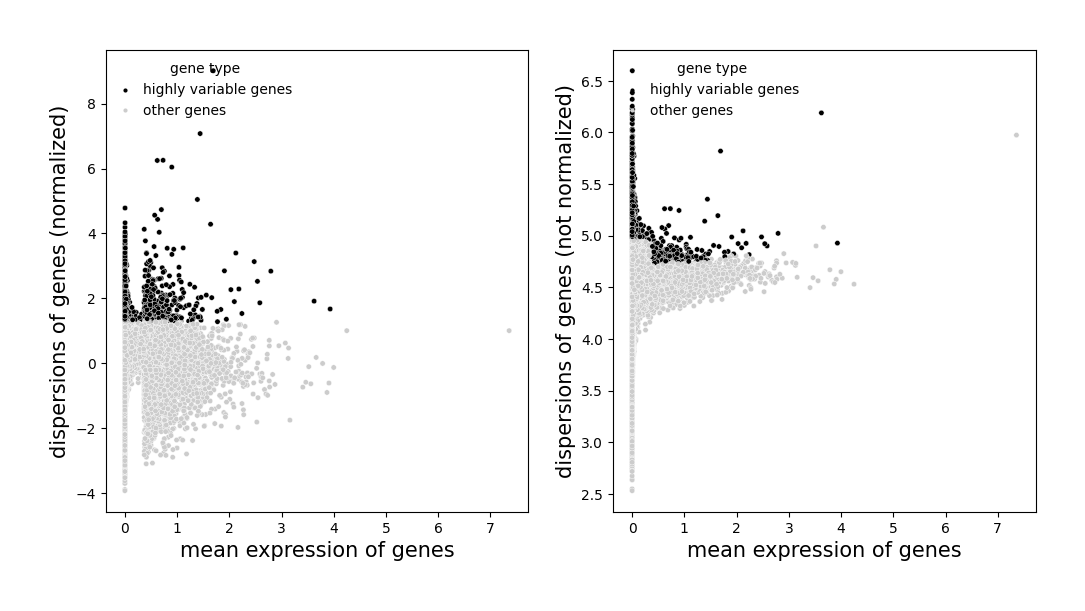

In [16]:
# remember to choose a res_key when plot

data.plt.highly_variable_genes(res_key='highly_variable_genes')

In [17]:
data.tl.scale(max_value=10, zero_center=True)



[2025-03-22 13:46:28][Stereo][327800][MainThread][135010282481472][st_pipeline][41][INFO]: start to run scale...
[2025-03-22 13:47:13][Stereo][327800][MainThread][135010282481472][scale][53][INFO]: Truncate at max_value 10
[2025-03-22 13:47:18][Stereo][327800][MainThread][135010282481472][st_pipeline][44][INFO]: scale end, consume time 49.8028s.


In [18]:


data.tl.pca(
        use_highly_genes=False,
        n_pcs=30,
        res_key='pca'
        )



[2025-03-22 13:47:18][Stereo][327800][MainThread][135010282481472][st_pipeline][41][INFO]: start to run pca...
[2025-03-22 13:48:25][Stereo][327800][MainThread][135010282481472][st_pipeline][44][INFO]: pca end, consume time 66.9875s.


In [21]:
data.tl.key_record



{'hvg': ['highly_variable_genes'],
 'pca': ['pca'],
 'neighbors': [],
 'umap': [],
 'cluster': [],
 'marker_genes': []}

[2025-03-22 13:48:25][Stereo][327800][MainThread][135010282481472][plot_collection][84][INFO]: register plot_func elbow to <stereo.plots.plot_collection.PlotCollection object at 0x7ac9d2490ac0>


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

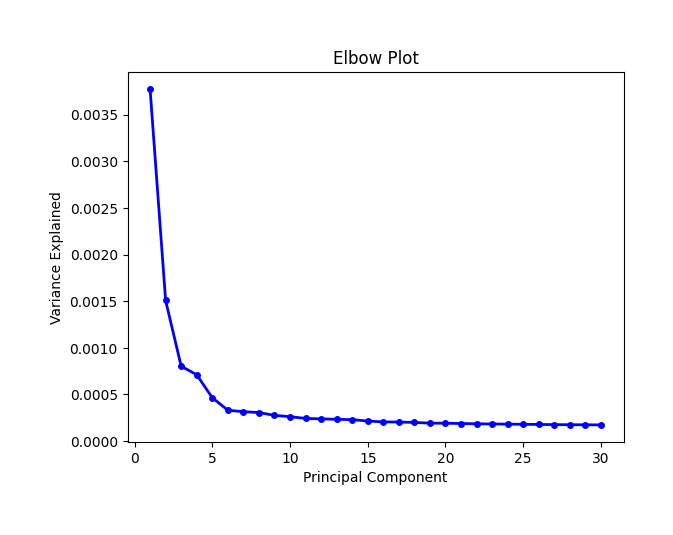

In [22]:
data.plt.elbow(pca_res_key='pca')

In [23]:
data.tl.neighbors(
        pca_res_key='pca',
        n_pcs=30,
        res_key='neighbors'
        )

# compute spatial neighbors
data.tl.spatial_neighbors(
        neighbors_res_key='neighbors',
        res_key='spatial_neighbors'
        )


[2025-03-22 13:48:25][Stereo][327800][MainThread][135010282481472][st_pipeline][41][INFO]: start to run neighbors...
2025-03-22 13:48:29.036475: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-22 13:48:29.048068: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-22 13:48:29.138728: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-22 13:48:29.139615: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate c

In [24]:
data.tl.umap(pca_res_key='pca', neighbors_res_key='neighbors', res_key='umap')

[2025-03-22 13:49:06][Stereo][327800][MainThread][135010282481472][st_pipeline][41][INFO]: start to run umap...


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs


[2025-03-22 13:51:24][Stereo][327800][MainThread][135010282481472][st_pipeline][44][INFO]: umap end, consume time 138.6855s.


In [25]:
data.tl.leiden(neighbors_res_key='neighbors', res_key='leiden')



[2025-03-23 15:06:17][Stereo][327800][MainThread][135010282481472][st_pipeline][41][INFO]: start to run leiden...
[2025-03-23 15:08:39][Stereo][327800][MainThread][135010282481472][st_pipeline][44][INFO]: leiden end, consume time 141.8899s.


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

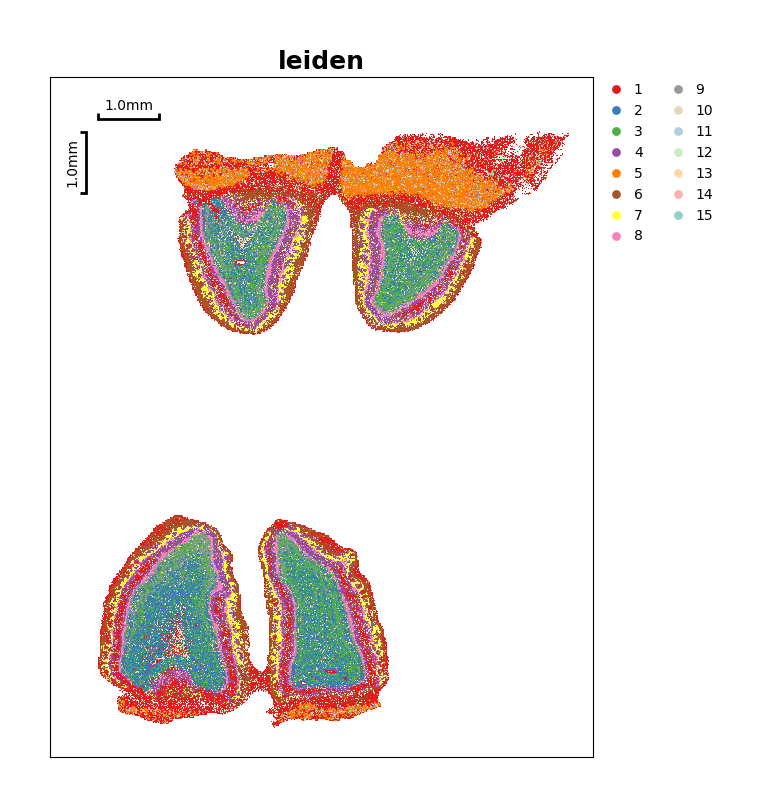

In [26]:
data.plt.cluster_scatter(res_key='leiden')



Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

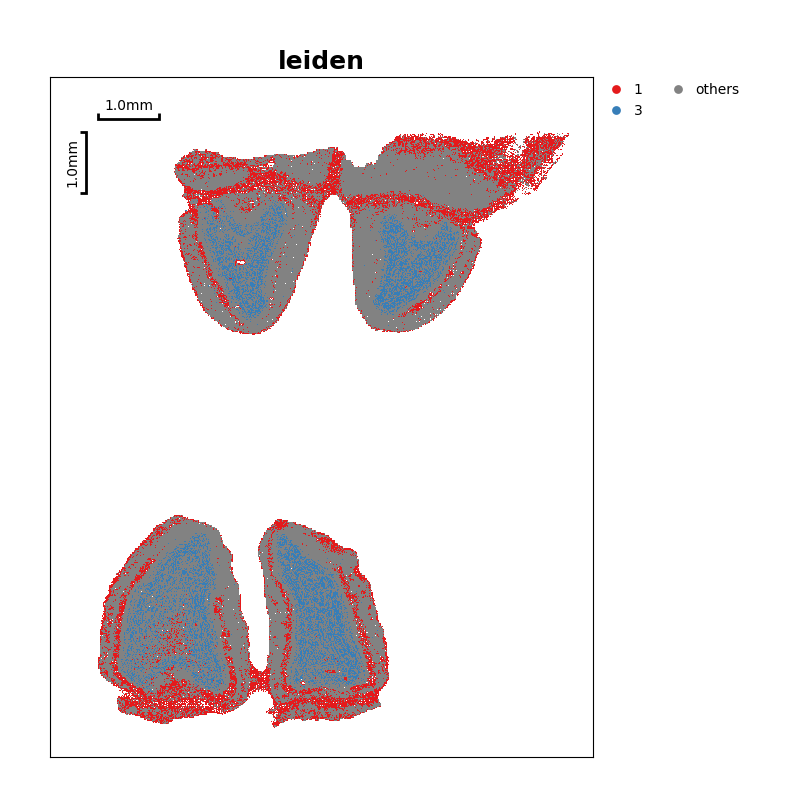

In [27]:
data.plt.cluster_scatter(res_key='leiden', groups=['1', '3'])



In [ ]:
data.tl.leiden(neighbors_res_key='spatial_neighbors', res_key='spatial_leiden')

[2025-03-23 15:12:25][Stereo][327800][MainThread][135010282481472][st_pipeline][41][INFO]: start to run leiden...


In [ ]:
data.plt.cluster_scatter(res_key='spatial_leiden')



In [ ]:
data.tl.louvain(neighbors_res_key='neighbors', res_key='louvain')

In [ ]:


data.plt.cluster_scatter(res_key='louvain')



In [ ]:
data.plt.umap(gene_names=['4930447K03Rik'], res_key='umap')

In [ ]:

data.tl.phenograph(phenograph_k=30, pca_res_key='pca', res_key='phenograph')


In [ ]:
data.plt.cluster_scatter(res_key='phenograph')

In [ ]:
data.tl.find_marker_genes(
        cluster_res_key='spatial_leiden',
        method='wilcoxon_test',
        use_highly_genes=False,
        use_raw=True
        )

[2025-02-24 10:40:47][Stereo][405958][MainThread][139752497751872][st_pipeline][41][INFO]: start to run find_marker_genes...
[2025-02-24 10:40:48][Stereo][405958][MainThread][139752497751872][tool_base][122][INFO]: read group information, grouping by group column.
[2025-02-24 10:40:48][Stereo][405958][MainThread][139752497751872][tool_base][151][INFO]: start to run...
[2025-02-24 10:40:50][Stereo][405958][MainThread][139752497751872][find_markers][233][INFO]: cal rankdata
[2025-02-24 10:42:33][Stereo][405958][MainThread][139752497751872][find_markers][235][INFO]: cal tie_term
[2025-02-24 10:42:33][Stereo][405958][MainThread][139752497751872][find_markers][238][INFO]: cal tie_term end


In [ ]:
data.plt.marker_genes_text(
        res_key='marker_genes',
        markers_num=10,
        sort_key='scores'
        )

In [ ]:
data.tl.filter_marker_genes(
    marker_genes_res_key='marker_genes',
    min_fold_change=1,
    min_in_group_fraction=0.25,
    max_out_group_fraction=0.5,
    res_key='marker_genes_filtered'
)

In [ ]:
data.plt.marker_genes_scatter(res_key='marker_genes_filtered', markers_num=5)



In [ ]:
data.plt.marker_gene_volcano(group_name='4.vs.rest', vlines=False)



In [ ]:


data.tl.filter_marker_genes(
    marker_genes_res_key='marker_genes',
    min_fold_change=1,
    min_in_group_fraction=0.25,
    max_out_group_fraction=0.5,
    res_key='marker_genes_filtered'
)



In [ ]:
import pandas as pd

In [ ]:
# Step 1: Access the filtered marker genes
filtered_markers = data.tl.result['marker_genes_filtered']

# Step 2: Extract the 'pct' and 'pct_rest' DataFrames
pct_df = filtered_markers['pct']  # Percentage in clusters
pct_rest_df = filtered_markers['pct_rest']  # Percentage in the rest of the cells

# Step 3: Rename columns in pct_rest_df to avoid conflicts
pct_rest_df.columns = [f'rest_{col}' if col != 'genes' else col for col in pct_rest_df.columns]

# Step 4: Merge the DataFrames on the 'genes' column
combined_df = pd.merge(pct_df, pct_rest_df, on='genes')

# Step 5: Export to Excel
combined_df.to_excel("filtered_marker_genes_adult_OB.xlsx", index=False)

In [ ]:
data.plt.interact_annotation_cluster(
            res_cluster_key='leiden',
            res_marker_gene_key='marker_genes_filtered',
            res_key='leiden_annotation'
            )

In [ ]:
adata = st.io.stereo_to_anndata(data, output='Young_bin20_x.h5ad')

In [ ]:
adata = st.io.read_anndata('/home/sYoung_bin20.h5ad')



In [ ]:
import pandas as pd

In [ ]:
import scanpy as sc
from matplotlib.pyplot import rc_context

In [ ]:
sc.set_figure_params(dpi=100, color_map="viridis_r")
sc.settings.verbosity = 0
sc.logging.print_header()

In [ ]:
with rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(adata, color="Pcp4")

In [ ]:
marker_genes_dict = {
    "GCL": ["Pcp4"],
    "GL": ["Calb2"],
    "MCL": ["Cdhr1"],
    "RMS": ["Sox11"],
    "ONL": ["Kctd12"],
}

In [ ]:
Dotplot axes: {'mainplot_ax': <Axes: >, 'size_legend_ax': <Axes: title={'center': 'Fraction of cells\nin group (%)'}>, 'color_legend_ax': <Axes: title={'center': 'Mean expression\nin group'}>}

In [ ]:
sc.pl.dotplot(adata, marker_genes_dict, "spatial_leiden", dendrogram=False, figsize=(7,3))

In [ ]:
dp = sc.pl.dotplot(adata, marker_genes_dict, 'spatial_leiden', return_fig=True, figsize=(7,3))
dp.add_totals().style(dot_edge_color='black', dot_edge_lw=0.5).show()

In [ ]:
with rc_context({"figure.figsize": (4.5, 3)}):
    sc.pl.violin(
        adata,
        ["n_genes_by_counts", "pct_counts_mt"],
        groupby="spatial_leiden",
        stripplot=False,  # remove the internal dots
        inner="box",  # adds a boxplot inside violins
    )

In [ ]:
adata

In [ ]:
import pandas as pd
import scanpy as sc


adata = "

counts_matrix = adata.X  # This is already a dense NumPy array

# Create a DataFrame
# Rows = cells/spots, Columns = genes
counts_df = pd.DataFrame(
    counts_matrix,
    index=adata.obs_names,  # Cell/spot barcodes
    columns=adata.var_names  # Gene names
)

counts_df.to_csv("young_counts_matrix.csv", index=True)

In [ ]:
metadata = adata.obs

metadata.to_csv('metadata.csv')